## Simple linear regression

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1- Data Ingestion

In [3]:
import pandas as pd
df=pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Profit ~ RND
## PROFIT_pred= B0 +B1*RND

## Least Square Error Model

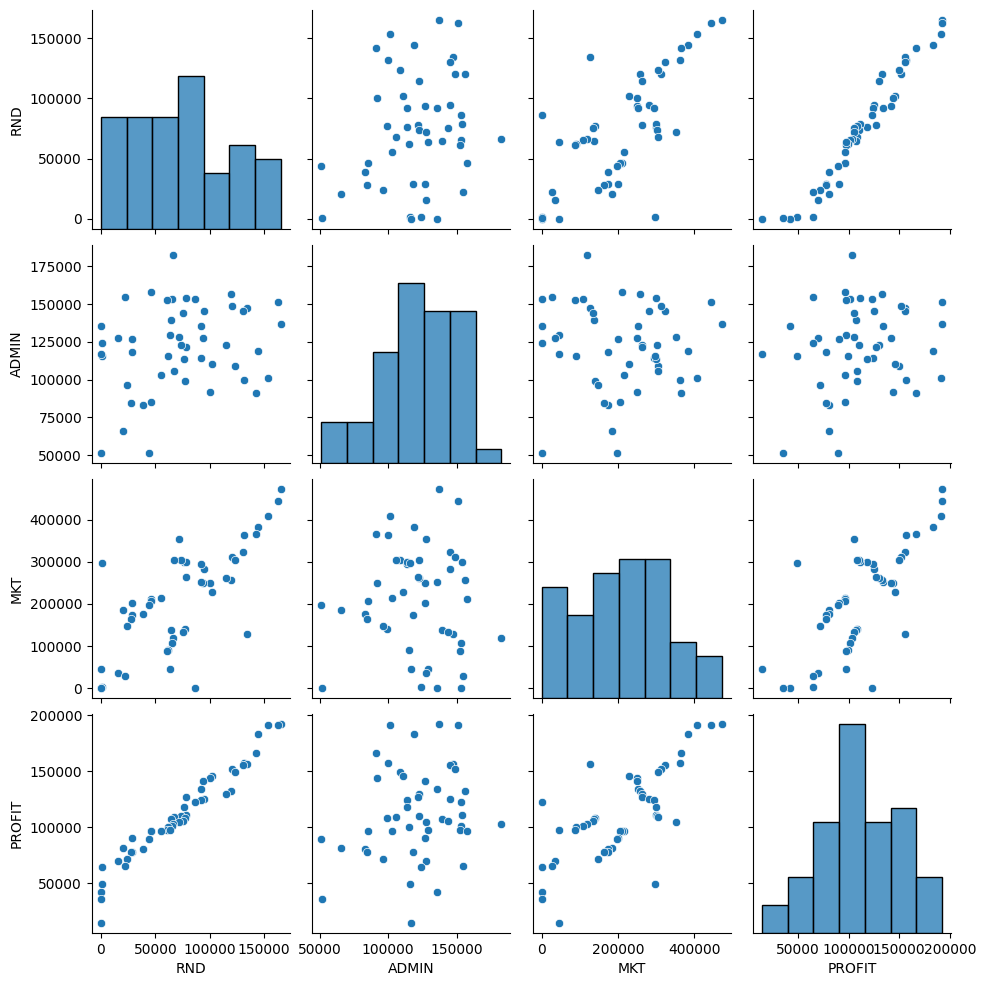

In [6]:
import seaborn as sns
sns.pairplot(df)

## Step 2- Perform basic data quality

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

## Step 3- Seperate X(RND) and Y(PROFIT)

In [13]:
X=df[["RND"]]
Y=df[["PROFIT"]]

In [14]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [15]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Step 4- Build the Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X,Y) 

LinearRegression()

## PROFIT= B0+B1*RND
## B0 - Intercept
## B1- Slope/Coefficient

In [19]:
model.intercept_

array([49032.89914125])

In [20]:
model.coef_

array([[0.85429137]])

## PROFIT_pred= 49032.9 + 0.8542*RND

## If RND increases by 1 unit Profit will increase by 0.8542
## If RND budget is 0 the profit is 49032.9 on an average

## Step 5- Model Evaluation

In [23]:
ypred=model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [24]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [21]:
from sklearn.metrics import(
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [31]:
def evaluate_model(model,x,y):
    ypred=model.predict(x)
    rmse=root_mean_squared_error(y,ypred)
    mae=mean_absolute_error(y,ypred)
    mape=mean_absolute_percentage_error(y,ypred)
    r2=r2_score(y,ypred)

    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 Score : {r2:.2%}")


In [32]:
evaluate_model(model,X,Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 Score : 94.65%


## From above R2 score > 80% hence model is good

## Visualising straight line fit

<Axes: xlabel='RND', ylabel='PROFIT'>

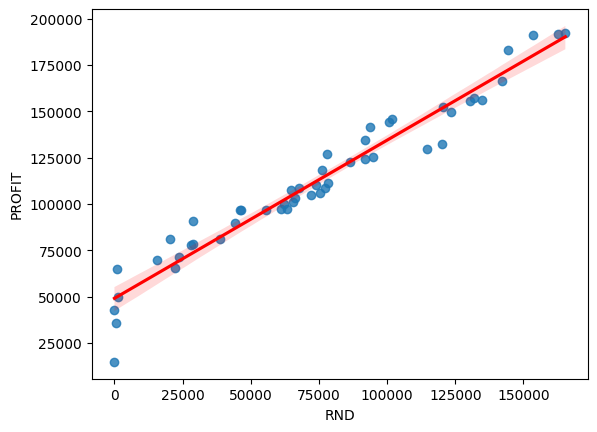

In [35]:
sns.regplot(data=df,x="RND",y="PROFIT",line_kws={"color":"red"})

## Step 6-Out of sample prediction

In [36]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [38]:
rnd=1_70_000
pred=model.predict(([[rnd]]))
pred

c:\ML VS Code\repository\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[194262.43220085]])